# 1. 기본 scatter plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1-1. scatter plot 생성

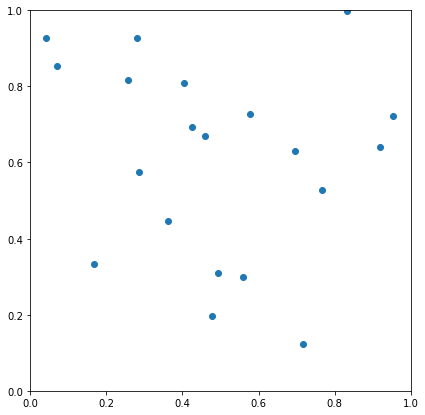

In [3]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, aspect=1)

np.random.seed(970725)

x = np.random.rand(20)
y = np.random.rand(20)

ax.scatter(x,y)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.show()

## 1-2. scatter plot의 요소
- 색
- 모양
- 크기

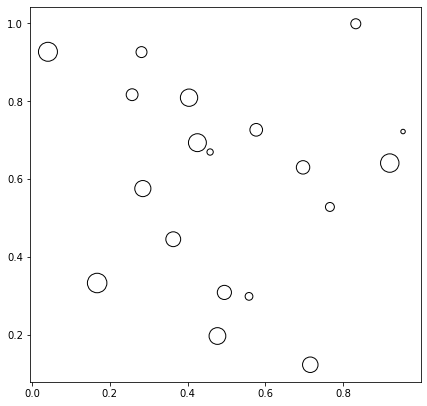

In [7]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, aspect=1)

np.random.seed(970725)

x = np.random.rand(20)
y = np.random.rand(20)
s = np.arange(20)*20

ax.scatter(x,y,
           s=s,
           c='white',
           marker='o',
           linewidth=1,
           edgecolor='black')

plt.show()

# 2. 정확한 Scatter Plot

In [8]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


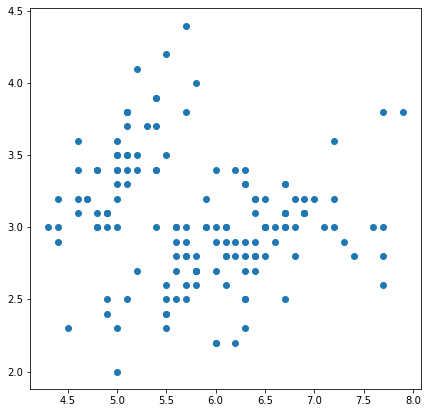

In [10]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

ax.scatter(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'])

조건 추가

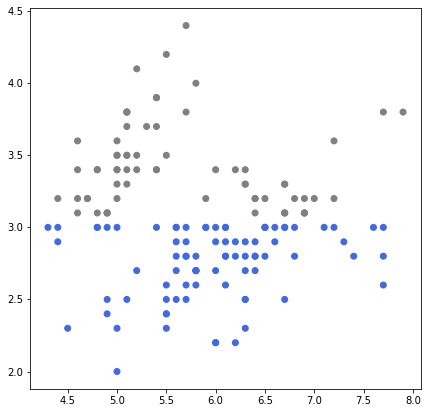

In [14]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

slc_mean = iris['SepalLengthCm'].mean()
swc_mean = iris['SepalWidthCm'].mean()

ax.scatter(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'],
#           c=['royalblue' if xx <= slc_mean else 'gray' for xx in iris['SepalLengthCm']])
           c=['royalblue' if yy <= swc_mean else 'gray' for yy in iris['SepalWidthCm']])


plt.show()

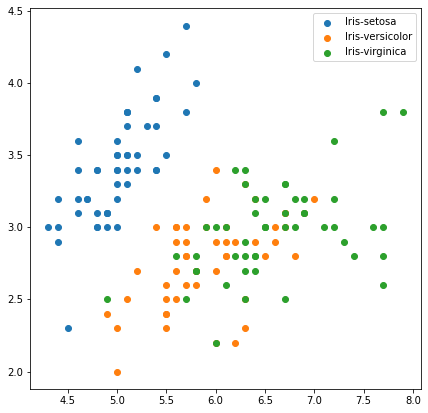

In [15]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

for species in iris['Species'].unique():
    iris_sub = iris[iris['Species'] == species]
    ax.scatter(x=iris_sub['SepalLengthCm'],
               y=iris_sub['SepalWidthCm'],
               label = species)
    
ax.legend()
plt.show()

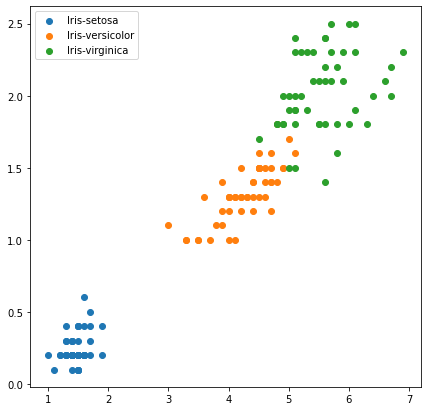

In [16]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

for species in iris['Species'].unique():
    iris_sub = iris[iris['Species'] == species]
    ax.scatter(x=iris_sub['PetalLengthCm'],
               y=iris_sub['PetalWidthCm'],
               label = species)
    
ax.legend()
plt.show()

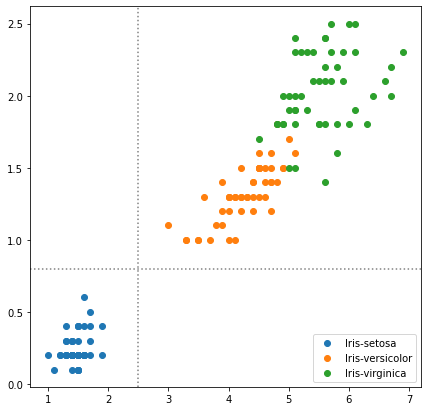

In [17]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

for species in iris['Species'].unique():
    iris_sub = iris[iris['Species'] == species]
    ax.scatter(x=iris_sub['PetalLengthCm'],
               y=iris_sub['PetalWidthCm'],
               label = species)
ax.axvline(2.5, color='gray', linestyle=':')
ax.axhline(0.8, color='gray', linestyle=':')
    
ax.legend()
plt.show()

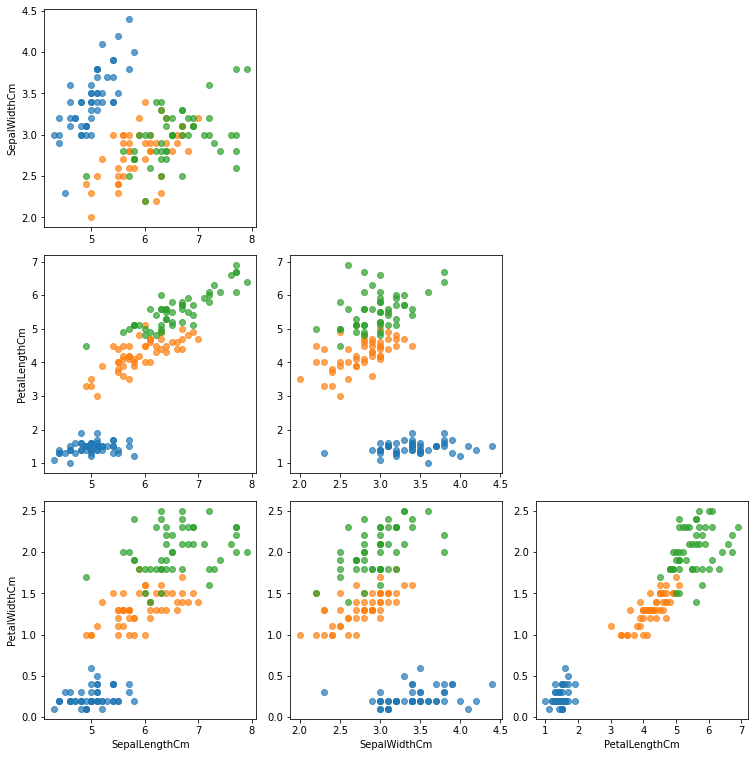

In [22]:
fig, axes = plt.subplots(4,4,figsize=(14,14))

feat = list(iris.columns[1:-1])

for i, f1 in enumerate(feat):
    for j, f2 in enumerate(feat):
        if i <= j :
            axes[i][j].set_visible(False)
            continue
        for species in iris['Species'].unique():
            iris_sub = iris[iris['Species']==species]
            axes[i][j].scatter(x=iris_sub[f2],
                               y=iris_sub[f1],
                               label=species,
                               alpha=0.7)
        if i == 3 : axes[i][j].set_xlabel(f2)
        if j == 0 : axes[i][j].set_ylabel(f1)
        
plt.tight_layout()
plt.show()
        